# Fluid flow experiments

In [60]:
from matplotlib import pyplot as plt
import numpy as np
import math 

In [61]:
def laminar(R):
    return 64/(R)

In [62]:
import timeit

start = timeit.timeit()
print("time")
end = timeit.timeit()
print(end - start)

time
-0.006216931744802423


### Clamond Method

C:\Users\sB006047682\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\sB006047682\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


runtime
0.004934258356115606
runtime
-0.00017334194762952393
runtime
0.00026343414310758817
runtime
-0.0005539529661291454
runtime
1.596570564288413e-05
runtime
9.664953950050403e-05


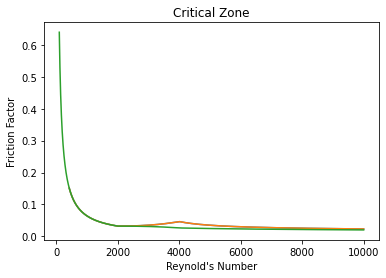

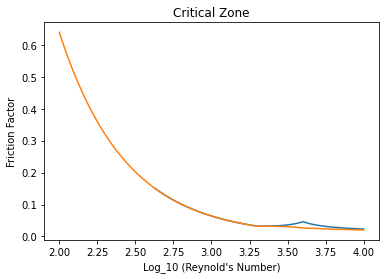

-0.0005579443923124927


In [82]:
def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f


start = timeit.timeit() 
Ra=np.arange(100, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
plt.plot(Ra,D)
plt.plot(Ra,E)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.plot(Raa,D)
plt.plot(Raa,E)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()

end = timeit.timeit()
print(end - start)


### Brkic Method

runtime
0.005500755804860091
runtime
0.0007210226722236257
runtime
0.005675238159710716
runtime
-0.0002486088455952995
runtime
0.001423798823452671
runtime
0.0034465967100913986


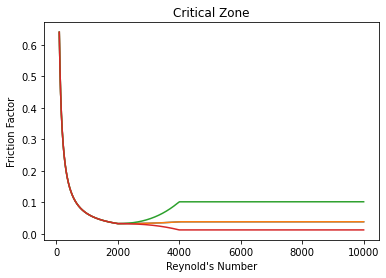

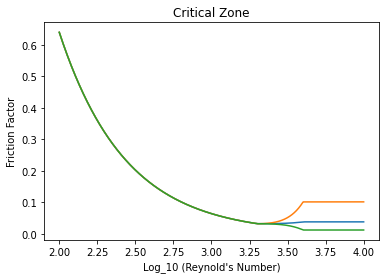

-6.728404468958615e-05


In [81]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f


start = timeit.timeit() 
Ra=np.arange(100, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
plt.plot(Ra,D)
plt.plot(Ra,E)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.plot(Raa,D)
plt.plot(Raa,E)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()

end = timeit.timeit()
print(end - start)

### Swamee-Jain Method

runtime
-0.004119437163353723
runtime
0.0047041811330927885
runtime
-0.0005536678645512438
runtime
0.005698331412531843
runtime
-0.00043306976613166626
runtime
-8.239444514401839e-05


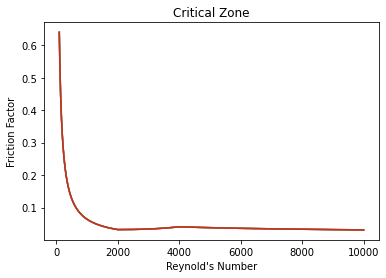

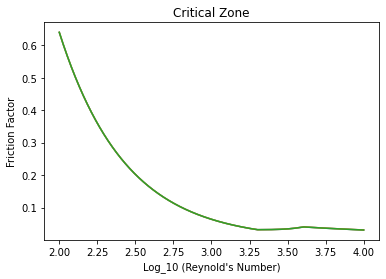

-0.00022323477742247633


In [84]:
def JainSwamee(R,k,d):
    eD=k/d
    f=-2*np.log10((eD/(3715))+(5.74/(R)**0.9))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=JainSwamee(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+JainSwamee(R,k,d)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f


start = timeit.timeit() 
Ra=np.arange(100, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
plt.plot(Ra,D)
plt.plot(Ra,E)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.plot(Raa,D)
plt.plot(Raa,E)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()


end = timeit.timeit()
print(end - start)

### Serghides1

runtime
-0.0052053902500119875
runtime
0.0033396835028725036
runtime
0.003655006189546839
runtime
0.00011175993950018892
runtime
-0.00014711257335875416
runtime
0.00185686858912959


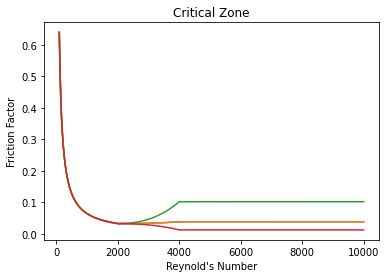

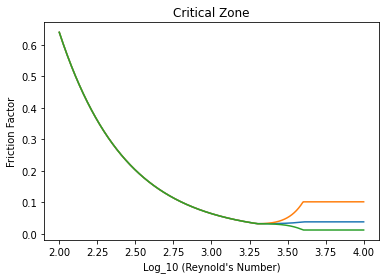

-0.0017031986722031434


In [90]:
def Serghides1(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(psi1-((psi1-psi1)**2)/(psi3-2*psi2+psi1))**(-2)
    return f


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides1(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides1(R,k,d)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f


start = timeit.timeit() 
Ra=np.arange(100, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
plt.plot(Ra,D)
plt.plot(Ra,E)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.plot(Raa,D)
plt.plot(Raa,E)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()

end = timeit.timeit()
print(end - start)

### Dobromyslov

runtime
0.004951934673044889
runtime
-3.0791004064667504e-05
runtime
-0.0008729819778636738
runtime
0.005119859684327821
runtime
0.00019985642211395316
runtime
-0.003285799245986709


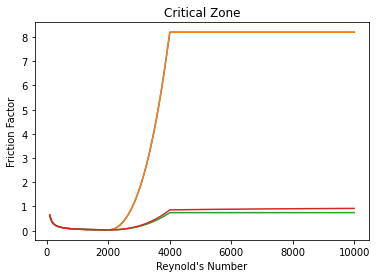

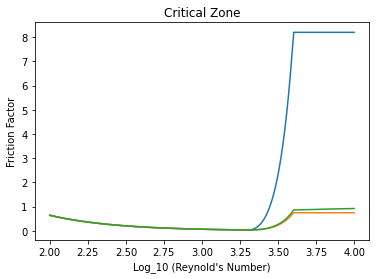

-0.00043763139638031134


In [77]:
def Dobromyslov(R,k,d):
    eD=k/d
    Rekv=500*(eD)
    B=(1+(np.log10(R)/np.log10(Rekv)))
    b=B*(B <= 2)+2*(B > 2)
    V=np.log10(3.7*eD)
    f=(0.5/V)*((b/2+(1.312*(2-b)*V)/(np.log10(R)-1)))
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Dobromyslov(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Dobromyslov(R,k,d)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f


start = timeit.timeit() 
Ra=np.arange(100, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
plt.plot(Ra,D)
plt.plot(Ra,E)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.plot(Raa,D)
plt.plot(Raa,E)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()

end = timeit.timeit()
print(end - start)

### Goudar & Sonnad (2008)

C:\Users\sB006047682\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


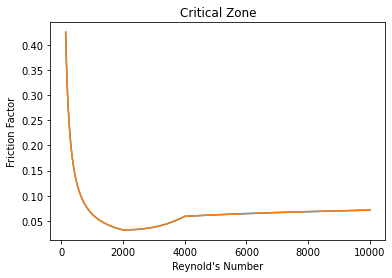

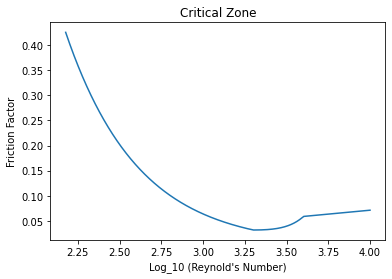

In [86]:
def GoudarSonnad2(R,k,d):
    eD=k/d
    a=2/(np.log(10))
    b=eD/3.7
    da=np.log(10)*(R)/5.02
    s=b*da*np.log(da)
    q=s/(s**(s+1))
    g=b*da+np.log(d/q)
    z=np.log(q/g)
    dla=z*(g/(g+1)) 
    dcfa=dla*((1+((z/2)/((g+1)**2+(z/3)*(2*g-1)))))
    f=a-(np.log(da/q)+dcfa)
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad2(R,k,d)*((R > 4000))
        return f



Ra=np.arange(100, 10000, .1);
k=0.01
d=1
Ra=np.arange(100, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
plt.plot(Ra,C)
plt.plot(Ra,C)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()


## Blasius

runtime
-0.0016202340229938272


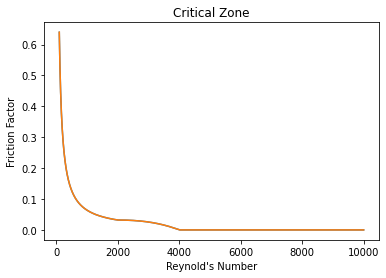

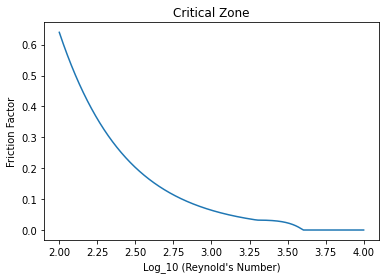

0.0025664871855042293


In [69]:
def Blasius(R,k):
    f=0.316/(R**(1/4))*(k==0)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Blasius(X2,k)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Blasius(R,k)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f

C=Fluidflowx(Ra,k,d)
plt.plot(Ra,C)
plt.plot(Ra,C)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()

end = timeit.timeit()
print(end - start)

### Haaland Method

runtime
0.00046215015890993527
runtime
-0.0011238716379011748
runtime
-0.00039572141895405366
runtime
0.0005471105209835514
runtime
-4.7897116928652395e-05
runtime
0.00022038375846022973


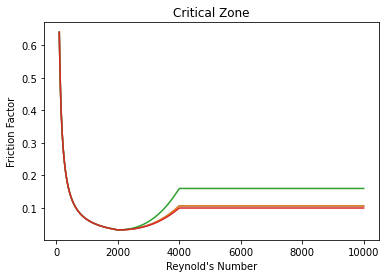

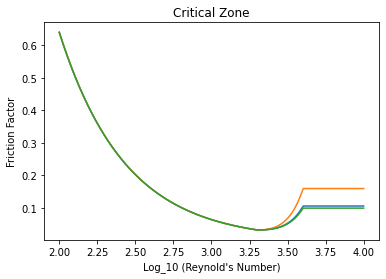

-0.000864428920976934


In [88]:
def haaland(R,k,d):
    eD=k/d
    f=-1.8*(np.log10(eD/3.7**1.11+69/R))
    f=1/(f*f)
    return f  


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=haaland(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        start = timeit.timeit()
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+haaland(4000,k,d)*((R > 4000))
        end = timeit.timeit()
        print("runtime")
        print(end - start)
        return f


start = timeit.timeit() 
Ra=np.arange(100, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
plt.plot(Ra,C)
plt.plot(Ra,D)
plt.plot(Ra,E)
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()
Raa=np.log10(Ra)
plt.plot(Raa,C)
plt.plot(Raa,D)
plt.plot(Raa,E)
plt.xlabel("Log_10 (Reynold's Number)")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.show()


end = timeit.timeit()
print(end - start)